## <font color='157699'> Importación de Librerías

In [1]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

import pandas as pd
import numpy as np
import sqlite3 as sql 
import a_funciones as funciones

## <font color='157699'> Importación de Datos

In [2]:
# Crear conexíon 
conn = sql.connect('data/my_database.db')
#conn = sql.connect('C:\\Users\\ESTEBAN\\Desktop\\Proyecto_RRHH\\data\\db')
curr = conn.cursor()
# Leer datos para 2016 
df_2015 = pd.read_sql("SELECT * FROM processed_data_2015", conn)

## <font color='157699'> Análisis descriptivo

In [3]:
funciones.check_df(df_2015)

**Shape**

(4308, 20)

**Types**

EmployeeID                   int64
Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
JobRole                     object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
retiro_2016                 object
renuncia2016                 int64
dtype: object

**Head**

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retiro_2016,renuncia2016
0,1,51,Travel_Rarely,Sales,6,2,Healthcare Representative,131160,1.0,11,6,1,0,3.0,4.0,2.0,3,3,None,0
1,2,31,Travel_Frequently,Research & Development,10,1,Research Scientist,41890,0.0,23,3,5,1,3.0,2.0,4.0,2,4,Resignation,1
2,3,32,Travel_Frequently,Research & Development,17,4,Sales Executive,193280,1.0,15,2,5,0,2.0,2.0,1.0,3,3,None,0
3,4,38,Non-Travel,Research & Development,2,5,Human Resources,83210,3.0,11,5,8,7,4.0,4.0,3.0,2,3,None,0
4,5,32,Travel_Rarely,Research & Development,10,1,Sales Executive,23420,4.0,12,2,6,0,4.0,1.0,3.0,3,3,None,0


**NA**

EmployeeID                    0
Age                           0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
JobRole                       0
MonthlyIncome                 0
NumCompaniesWorked            0
PercentSalaryHike             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
EnvironmentSatisfaction       0
JobSatisfaction               0
WorkLifeBalance               0
JobInvolvement                0
PerformanceRating             0
retiro_2016                3672
renuncia2016                  0
dtype: int64

**Duplicated**

0

Para preparar los datos para el análisis, se realizarán las siguientes transformaciones:

- **retiro_2016**: Se elimina la variable retiro_2016 ya que no aporta ningún valor, pues la variable de respuesta es renuncia_2016.

- **EmployeeID**: Se ha convertido a tipo `string` ya que es un identificador único para cada empleado. Este cambio asegura que el código se maneje correctamente como un identificador y no se interprete como un número, evitando confusiones en el futuro, especialmente si los códigos pueden incluir caracteres alfanuméricos.

- **PercentSalaryHike**: Se ha dividido por 100 y convertido a tipo `float` para representar el porcentaje en formato decimal. Originalmente, esta variable estaba en formato entero, lo que no es adecuado para cálculos matemáticos y modelos que requieren valores decimales. Al convertirlo, facilitamos su uso en análisis y modelos que necesitan datos porcentuales en formato decimal.

In [4]:
del df_2015['retiro_2016']
df_2015['EmployeeID'] = df_2015['EmployeeID'].astype(str)
df_2015['PercentSalaryHike'] = df_2015['PercentSalaryHike'] / 100

Las siguientes variables se han identificado como categóricas ordinales debido a su naturaleza y el orden en sus categorías:

- **EnvironmentSatisfaction**
- **JobSatisfaction**
- **WorkLifeBalance**
- **JobInvolvement**
- **PerformanceRating**
- **Education**

Estas variables representan categorías con un orden específico (por ejemplo, niveles de satisfacción o niveles educativos). Por lo tanto, se han mantenido en las columnas categóricas para su análisis, permitiendo aplicar técnicas adecuadas para variables ordinales y preservar el significado del orden en el análisis.

In [5]:
columns_num = ['Age', 'DistanceFromHome', 'MonthlyIncome', 
              'NumCompaniesWorked', 'TrainingTimesLastYear', 'YearsAtCompany',
              'YearsSinceLastPromotion','PercentSalaryHike']

columns_cat = ['BusinessTravel', 'Department', 'JobRole', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating','Education']



# <font color ='056938'> Análisis gráfico

## <font color='157699'> Análisis univariado

#### <font color='157699'> Variables numéricas

------------Age----------------


C:\Users\Manuela\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


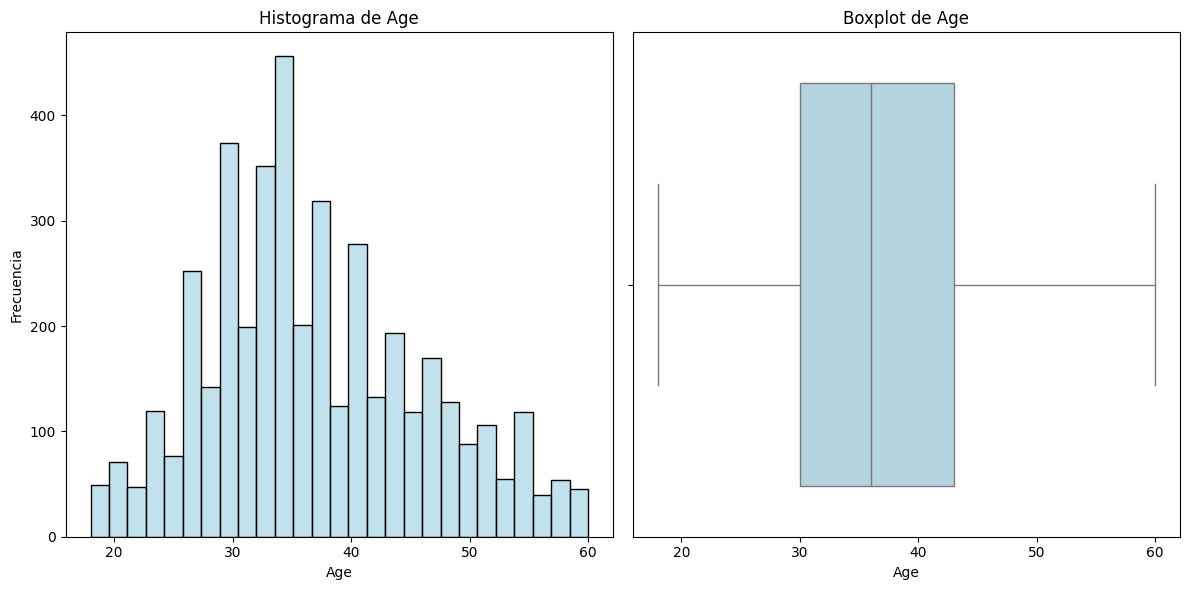

------------DistanceFromHome----------------


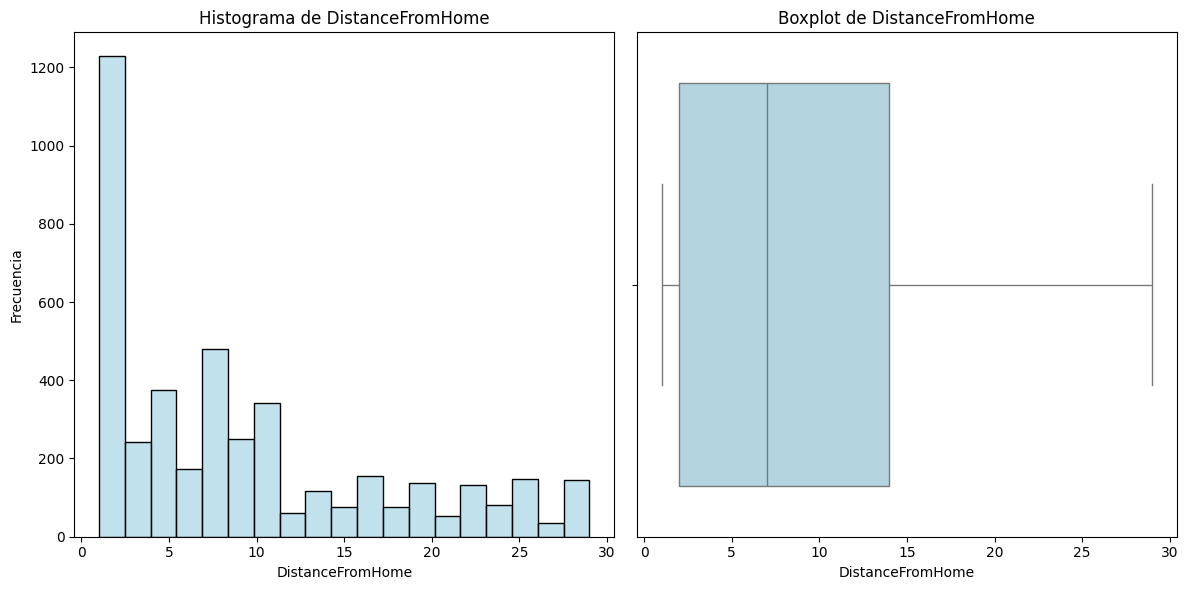

------------MonthlyIncome----------------


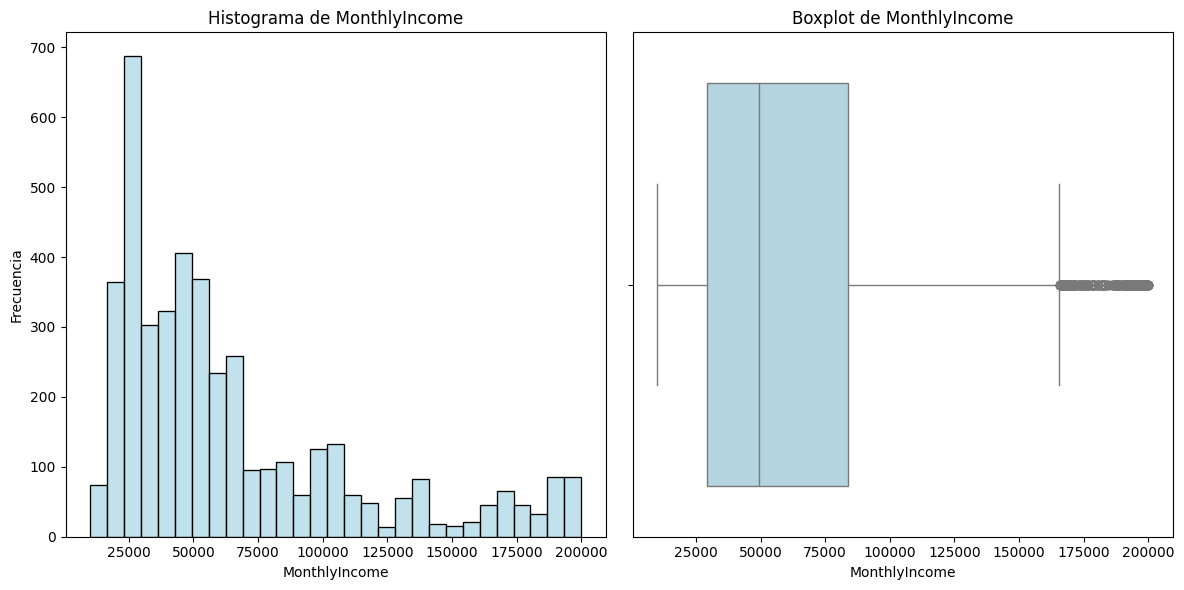

------------NumCompaniesWorked----------------


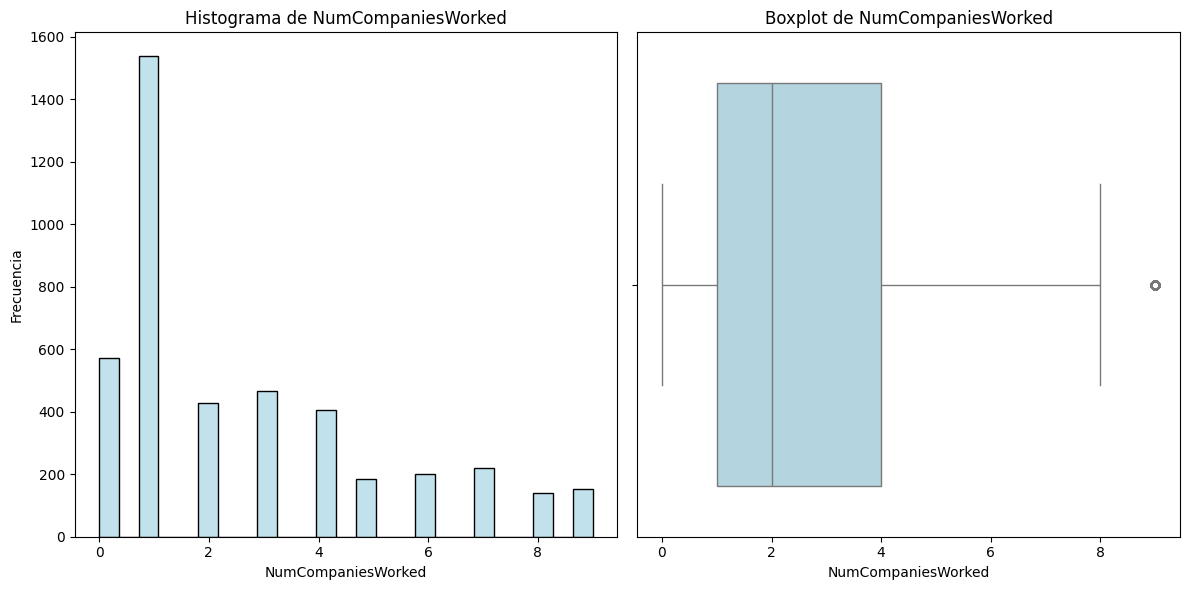

------------TrainingTimesLastYear----------------


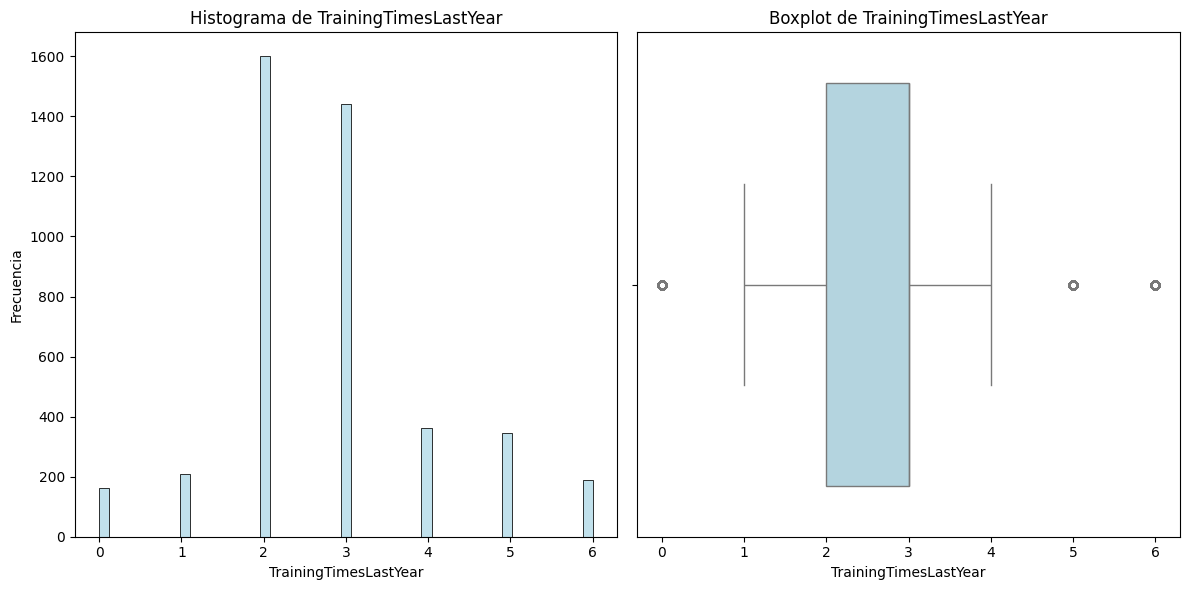

------------YearsAtCompany----------------


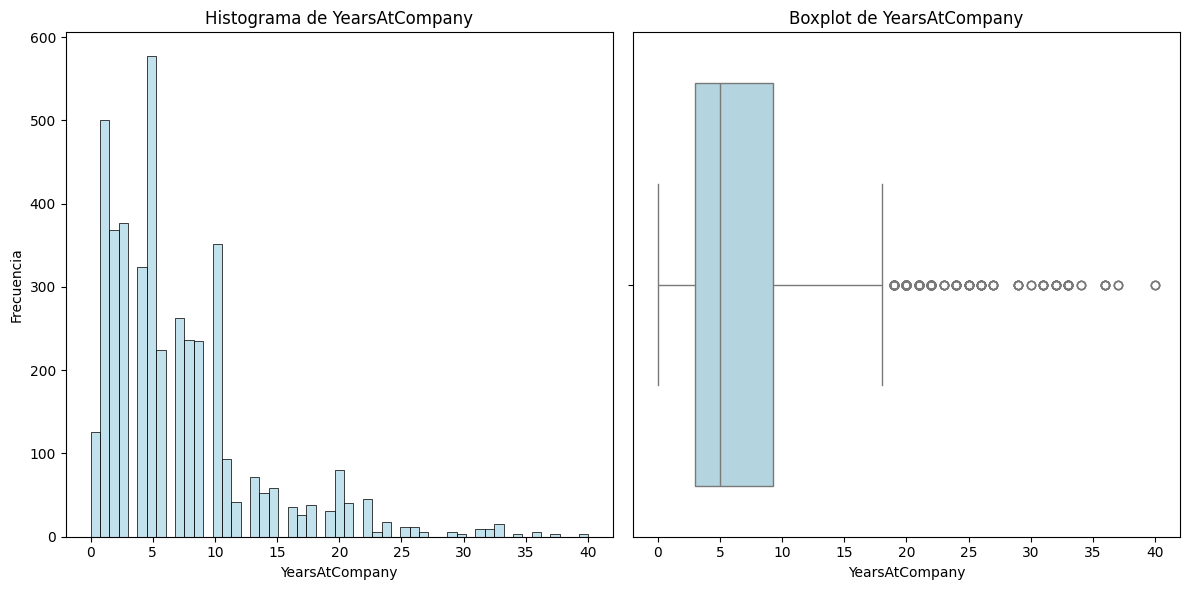

------------YearsSinceLastPromotion----------------


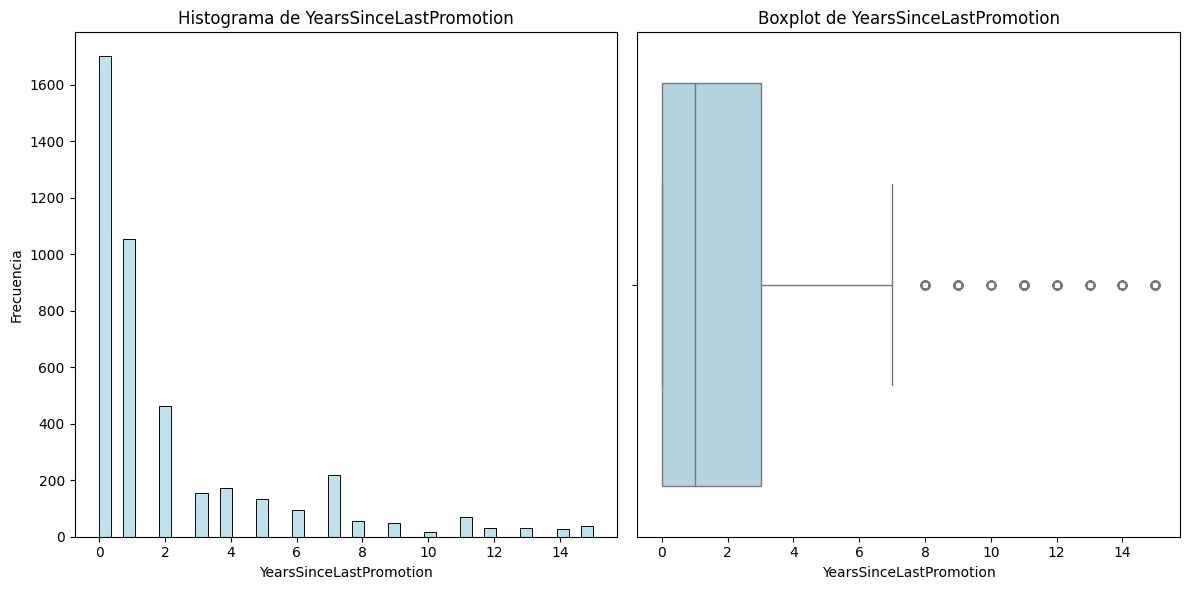

------------PercentSalaryHike----------------


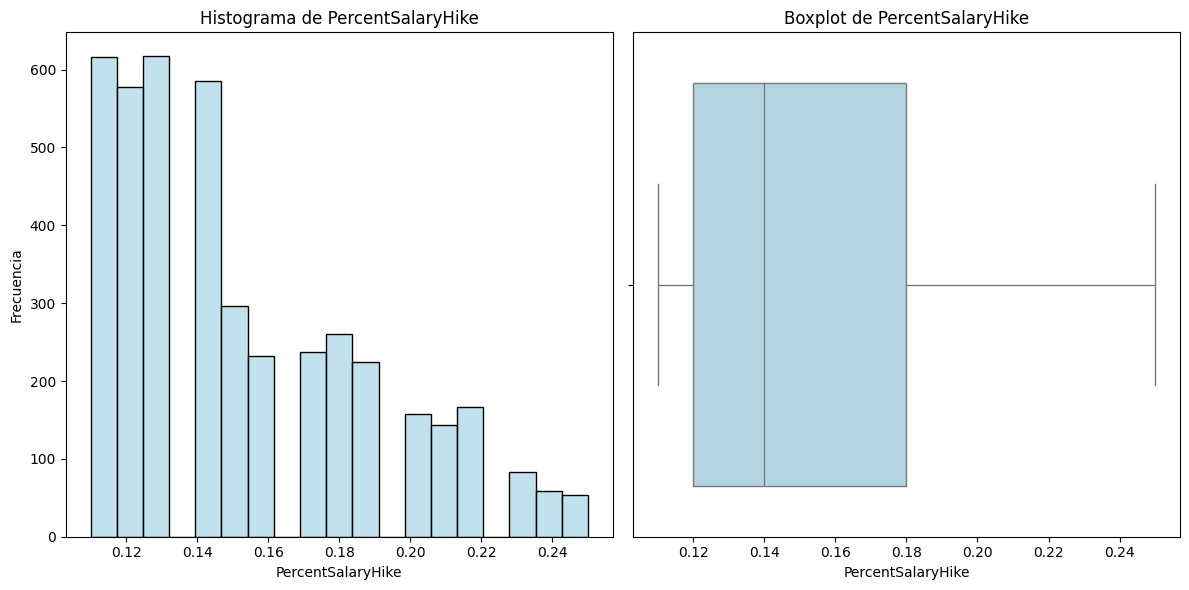

In [6]:
for i in columns_num:
    print(f'------------{i}----------------')
    funciones.plot_hist_box(df_2015,i)

Análisis univariado - variables numéricas:

**Age**
La distribución muestra que la mayoría de los empleados se concentran en edades tempranas a medias (entre 30 y 40 años), aunque existe una dispersión considerable hacia edades más avanzadas. La ausencia de outliers visibles en el boxplot sugiere que no hay empleados que tengan una edad extremadamente distinta al resto del grupo. 

**DistanceFromHome**
El histograma sugiere que la mayoría de los datos de la variable DistanceFromHome se concentran en distancias cercanas al hogar. La mediana parece estar alrededor de 7, lo que indica que la mitad de las personas vive a menos de 7 unidades de distancia de su hogar.

**MonthlyIncome**
La mayoría de los ingresos mensuales están concentrados entre 25,000 y 50,000, con una clara disminución en las frecuencias a medida que los ingresos aumentan. El boxplot revela que la mediana de los ingresos está alrededor de 50,000, con una gran dispersión hacia ingresos más altos y varios valores atípicos por encima de 125,000. Esto sugiere que la distribución de ingresos es asimétrica, con unos pocos individuos que ganan considerablemente más que el promedio, lo que genera una cola larga a la derecha en la distribución.

**NumCompaniesWorked**
La mayoría de las personas han trabajado en un número relativamente bajo de compañías, y hay una cola larga hacia la derecha que indica que un número menor de personas ha trabajado en muchas más compañías.

**TrainingTimesLastYear**
La mayoría de los empleados recibieron entre 2 y 3 capacitaciones, siendo 2 el valor más frecuente. Sin embargo, existe una amplia variabilidad, con algunos empleados recibiendo hasta 6 capacitaciones y otros ninguna.

**YearsAtCompany**
La mayoría de los empleados tienen una antigüedad relativamente corta en la empresa, con un pico alrededor de los 5 años. Sin embargo, hay una minoría significativa de empleados con muchos años de servicio. 

**YearsSinceLastPromotion**
La mayoría de los empleados recibieron su última promoción recientemente (0-2 años), pero hay una cola larga hacia la derecha que indica que un grupo considerable no ha recibido una promoción en varios años (más de 8 años).



#### Variables categóricas

In [7]:
for i in columns_cat:
    print(f'----------------------{i}--------------------------')
    funciones.plot_categorical_distribution(df_2015, i)

----------------------BusinessTravel--------------------------


----------------------Department--------------------------


----------------------JobRole--------------------------


----------------------EnvironmentSatisfaction--------------------------


----------------------JobSatisfaction--------------------------


----------------------WorkLifeBalance--------------------------


----------------------JobInvolvement--------------------------


----------------------PerformanceRating--------------------------


----------------------Education--------------------------


Análisis univariado - variables categoricas:

**BusinessTravel** Se observa que la mayoría de los empleados viajan "rara vez" por negocios, seguido de aquellos que viajan "frecuentemente". La categoría "no viajan" presenta la menor frecuencia. Esto sugiere que los viajes de negocios son una parte importante de la rutina laboral para una porción significativa de los empleados, pero no para todos. 

**Department** La mayoría de los empleados se encuentran en el departamento de Investigación y Desarrollo, seguido del departamento de Ventas. El departamento de Recursos Humanos es el menos numeroso. Esto sugiere que la empresa invierte significativamente en investigación y desarrollo de nuevos productos o servicios, y que las ventas son una función clave para la generación de ingresos. Dado que la mayoría de los empleados se concentran en un solo departamento, como Investigación y Desarrollo, la variabilidad de esta variable sería limitada, lo que reduciría su capacidad de aportar información predictiva significativa al modelo, por lo tanto se considera que no aporta información relevante al modelo.

**JobRole** La distribución de los roles laborales puede reflejar una estructura organizacional que prioriza la investigación, el desarrollo y las ventas, con funciones de soporte como recursos humanos y gestión en un papel secundario.

**EnvironmentSatisfaction y JobSatisfation** En ambas graficas se observa una tendencia hacia niveles altos de satisfacción, con una mayoría de empleados reportando calificaciones de 3 y 4, lo que indica que, en general, los empleados están satisfechos tanto con sus roles como con el ambiente laboral. Sin embargo, también se evidencia un grupo minoritario con niveles bajos de satisfacción. Dado que estas variables aportan información muy similar al modelo, se sugiere eliminar EnvironmentSatisfaction, ya que la JobSatisfaction podría ser un indicador más directo para predecir una renuncia, reflejando de manera más específica la relación entre el empleado y su trabajo, lo que tiene una influencia más inmediata en su decisión de quedarse o irse.

**WorkLifeBalance y JobInvolvement** Ambas gráficas muestran que la mayoría de los empleados reportan niveles altos de satisfacción, indicando que los empleados generalmente están contentos tanto con el equilibrio entre su vida personal y laboral como con su compromiso e involucramiento en sus tareas. Debido a que ambas variables aportan información muy parecida, es recomendable eliminar JobInvolvement, ya que WorkLifeBalance puede tener un mayor impacto en la decisión de renunciar al afectar directamente la calidad de vida del empleado.

**PerformanceRating** La frecuencia se concentra solo en dos clases, lo cual indica una falta de variabilidad en los datos que puede limitar la utilidad de la variable para ciertos análisis. 

**Education**
La mayoría de las personas tienen un nivel de educación intermedio, siendo el nivel 3 el más frecuente, seguido por el nivel 4. Los niveles 1 y 5 son menos comunes. 

**Conclusión: se decide eliminar PerformanceRating, EnvironmentSatisfaction , JobInvolvement**

In [8]:
columnas_a_eliminar = ['PerformanceRating', 'EnvironmentSatisfaction', 'JobInvolvement']
df_2015 = df_2015.drop(columns=columnas_a_eliminar)
df_2015.columns

Index(['EmployeeID', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'JobRole', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'JobSatisfaction', 'WorkLifeBalance',
       'renuncia2016'],
      dtype='object')

In [8]:
columns_cat = ['BusinessTravel', 'Department', 'JobRole',
       'JobSatisfaction', 'WorkLifeBalance', 'Education']

c:\Users\Manuela\Documents\Analitica 3\Analitica_3_Proyecto_1\a_funciones.py:149: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




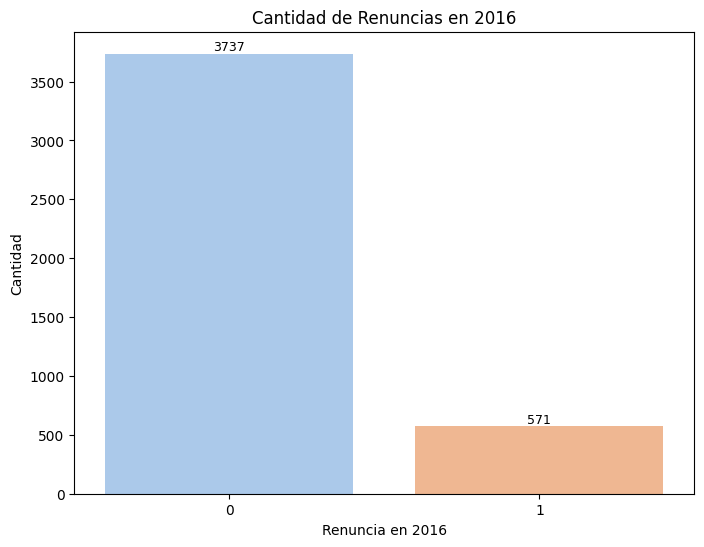

In [9]:
funciones.plot_renuncia_2016(df_2015, 'renuncia2016', titulo='Cantidad de Renuncias en 2016')

El gráfico de anillo muestra que en 2016, el 86.7% de los empleados no renunciaron a la empresa (representado por el valor 0), mientras que el 13.3% sí lo hizo (representado por el valor 1). Esta variable, al ser la variable objetivo de nuestro modelo, indica si un empleado decidió abandonar la empresa o no.Algo importante a resaltar es que las clases de la variable objetivo están desbalanceadas. Es conveniente aplicar balanceo de clases.

## <font color='157699'> Análisis Bivariado

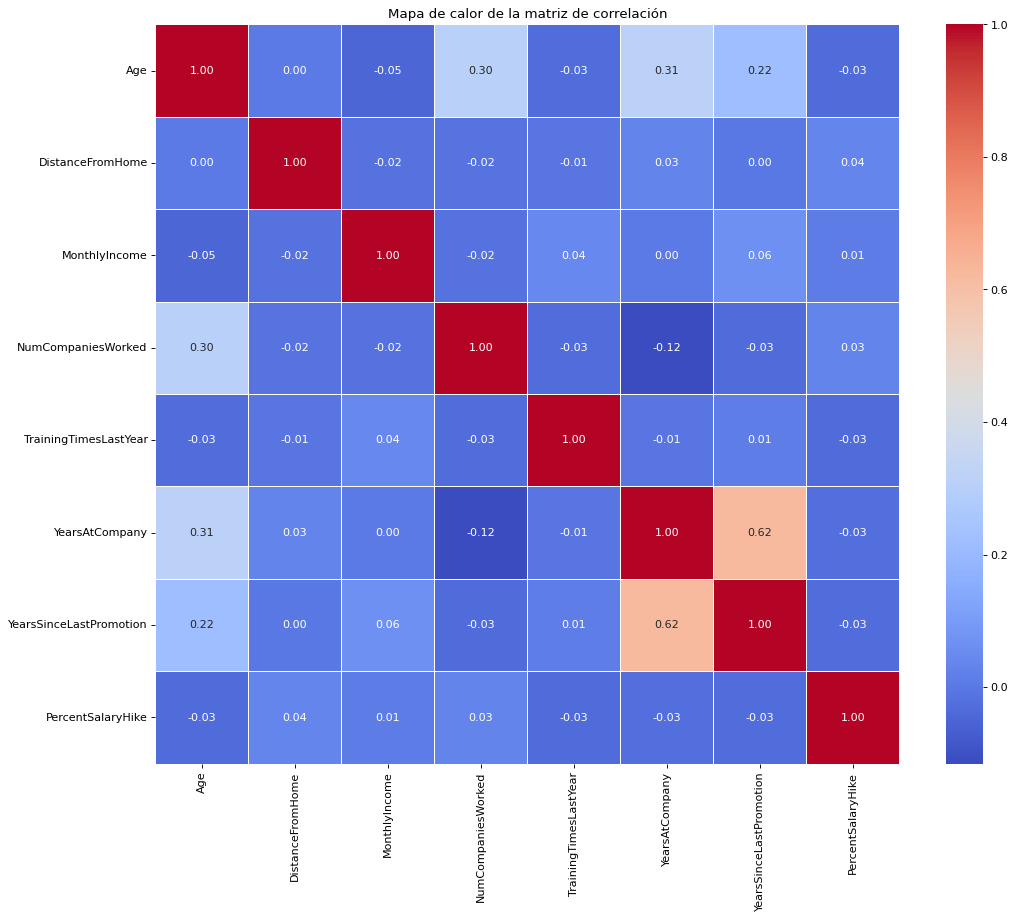

In [10]:
funciones.plot_correlation_matrix(df_2015, columns_num)

El mapa de calor de la matriz de correlación nos permite visualizar la relación entre las distintas variables relacionadas con datos de los empleados.
En primer lugar, La correlación más alta se observa entre **YearsAtCompany** (años en la empresa) y **YearsSinceLastPromotion** (años desde la última promoción), con un valor de 0.62. Esto sugiere que, a medida que aumenta el tiempo que un empleado ha pasado en la empresa, también es probable que haya pasado más tiempo desde su última promoción, esto podría incluir sesgos en los modelos predictivos por lo que alguna de las dos puede ser candidata a ser eliminada. 

Además, existe una correlación positiva moderada (0.30) entre **Age** (edad) y **NumCompaniesWorked** (número de empresas en las que ha trabajado), lo que indica que los empleados de mayor edad tienden a haber pasado por más empresas. 

También se destaca la correlación positiva entre la **edad** y los **años en la empresa** (0.31), lo que sugiere que los empleados mayores tienden a tener más antigüedad en la organización. 

Por otro lado, en cuanto a las **relaciones inversas**, aunque no hay correlaciones negativas fuertes, se puede observar una ligera relación negativa entre **NumCompaniesWorked** y **YearsAtCompany** (-0.12). Esto refleja que aquellos empleados que han trabajado en más empresas tienden a haber pasado menos tiempo en su empresa actual, lo cual es coherente con la lógica de movilidad laboral.

Finalmente, hay variables que muestran relaciones débiles o casi nulas lo que se considera apropiado puesto que no hay presencia de multicolinealidad. Por ejemplo, **Education** (nivel educativo), **DistanceFromHome** (distancia al trabajo) y **MonthlyIncome** (ingreso mensual) tienen correlaciones muy bajas con la mayoría de las otras variables. Esto indica que estos factores no están fuertemente relacionados con otros aspectos del trabajo, como el número de promociones o los años trabajados en la empresa. 

## <font color='157699'> Análisis variable de respuesta vs variables independientes

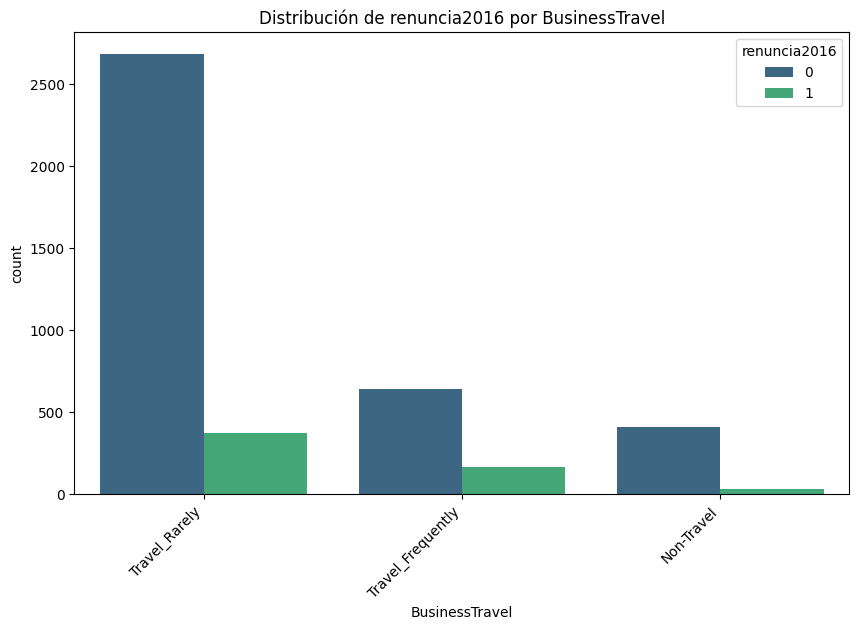

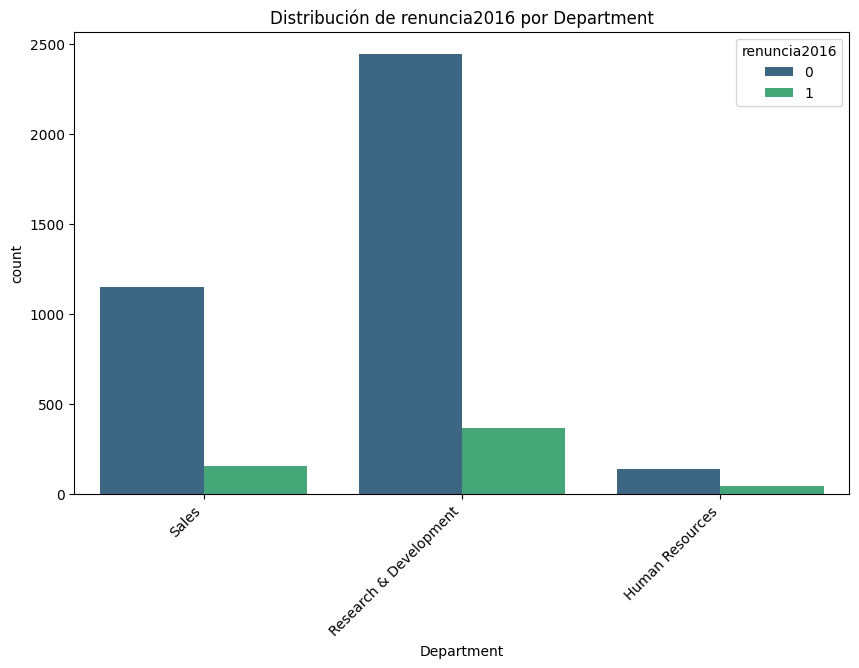

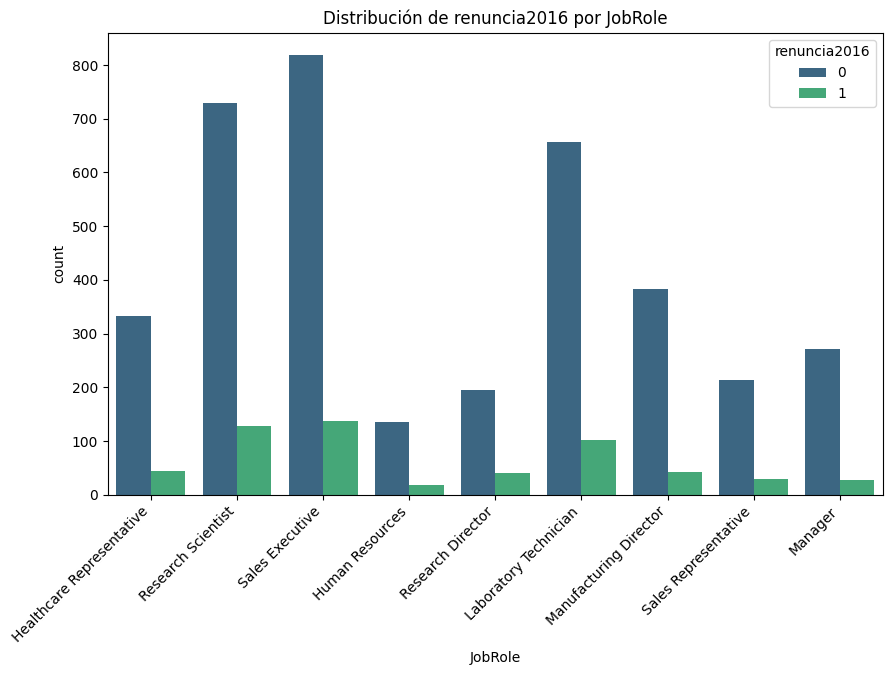

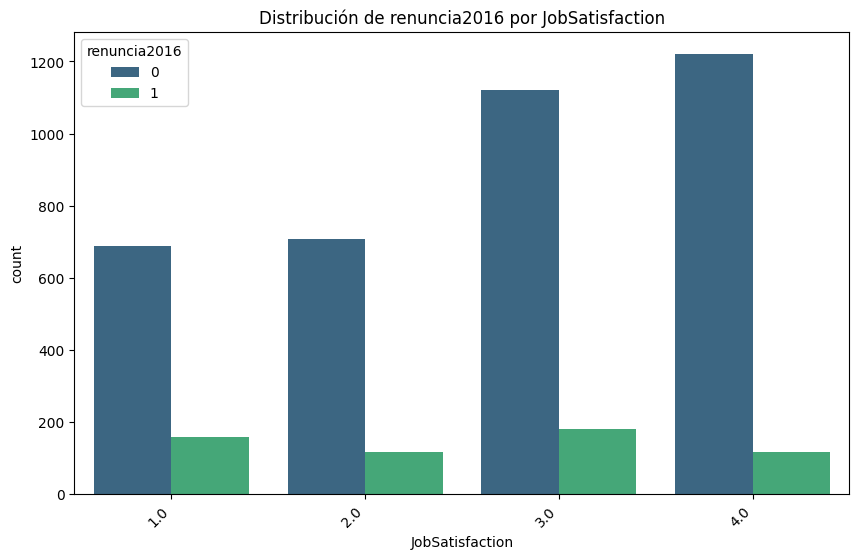

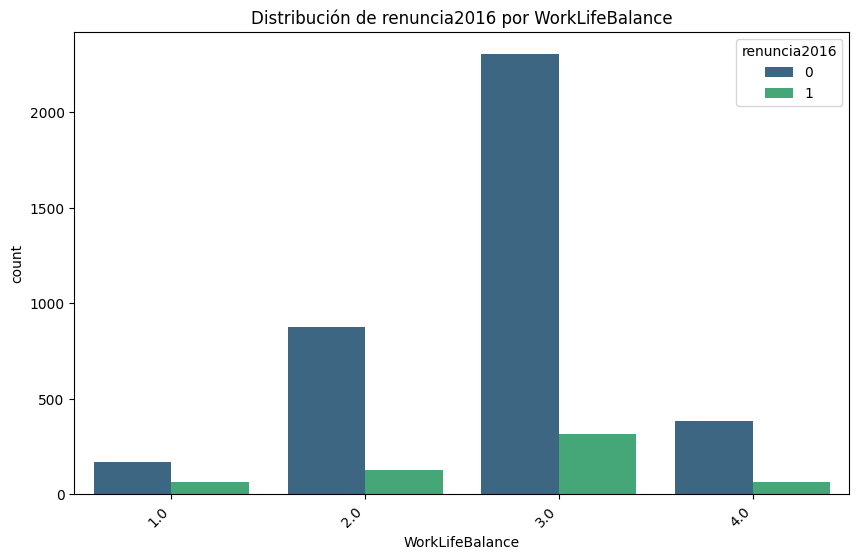

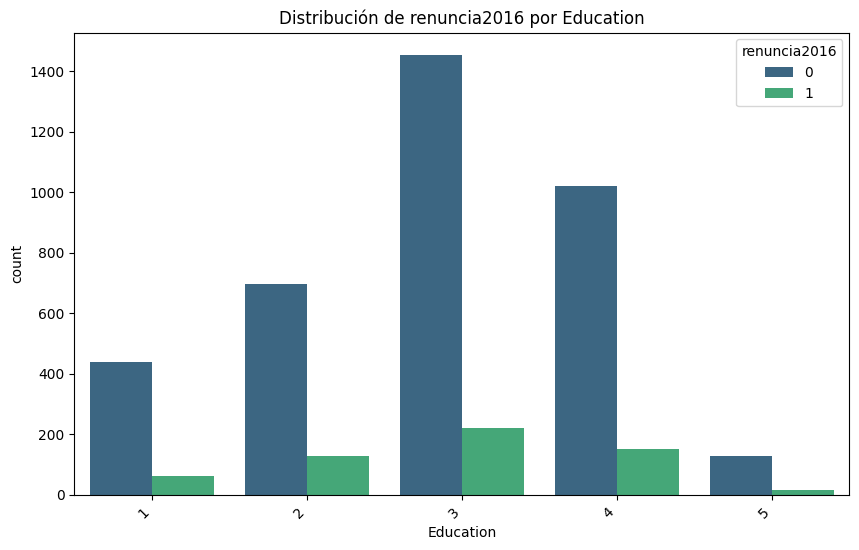

In [11]:

funciones.plot_categorical_vs_binary(df_2015, 'renuncia2016', columns_cat)


**BusinessTravel** Lo más importante a resaltar es que la mayor cantidad de renuncias proviene de aquellos empleados que viajan raramente. Aunque este grupo es el más numeroso, su participación en las renuncias es significativa. Por otro lado, los empleados que viajan con frecuencia también muestran una alta tasa de renuncias en proporción a su tamaño, lo que sugiere que los viajes frecuentes podrían estar relacionados con una mayor propensión a renunciar. Finalmente, los empleados que no viajan tienen una menor tasa de renuncias, lo que indica que la ausencia de viajes podría estar asociada con una mayor estabilidad laboral.

**EnvironmentSatisfaction** Este gráfico muestra la distribución de renuncias en el 2016 según el nivel de satisfacción con el entorno laboral. Se presentan cuatro niveles de satisfacción, del 1 al 4. Los resultados indican que la mayoría de los empleados que no renunciaron se encuentran en los niveles 3 y 4 de satisfacción con el entorno. Por otro lado, el número de renuncias es consistentemente bajo en todos los niveles, pero parece haber una ligera disminución en las renuncias conforme aumenta la satisfacción con el entorno.
Destaca que, a pesar de los niveles de satisfacción más bajos, aún hay una mayor cantidad de personas que no renuncian en comparación con las que sí lo hacen, lo que sugiere que otros factores podrían influir en la decisión de renunciar. Sin embargo, es evidente que un entorno laboral más satisfactorio tiende a estar relacionado con una menor probabilidad de renuncias, lo que refuerza la importancia de mejorar la satisfacción laboral para reducir la rotación.

**WorkLifeBalance** Este gráfico muestra la distribución de renuncias en el año 2016 según el equilibrio entre trabajo y vida personal. En este caso, los valores de equilibrio van del 1 al 4. El grupo más numeroso, con una clara mayoría de empleados que no renunciaron, corresponde al nivel 3 de equilibrio. Sin embargo, es interesante notar que, incluso con un buen equilibrio, sigue habiendo renuncias, aunque en menor proporción.
Un aspecto clave es que, en el nivel más bajo de equilibrio trabajo-vida, las renuncias son menos frecuentes, lo que podría sugerir que, aunque el equilibrio es importante, no es el único factor que influye en la decisión de renunciar. De hecho, el nivel más alto de renuncias se observa en el nivel 3, lo que podría implicar que el equilibrio percibido no siempre refleja la satisfacción real de los empleados o que intervienen otros elementos.

**PerformanceRating** El gráfico presenta la distribución de renuncias en el año 2016 en función de la calificación de desempeño, con dos niveles: 3 y 4. La mayoría de los empleados tienen una calificación de desempeño de 3, lo que se refleja en el gran número de personas que no renunciaron. A pesar de esto, aún se observan renuncias en este nivel, aunque en menor proporción en comparación con los empleados que permanecen.
En el nivel 4, tanto el número de empleados que no renunciaron como el de los que renunciaron es significativamente menor en comparación con el nivel 3. Esto sugiere que los empleados con una calificación de desempeño más alta tienen menos probabilidades de renunciar, aunque el número total de empleados en esta categoría es menor. Esto podría indicar que una calificación de desempeño más alta está relacionada con una mayor satisfacción o estabilidad en el trabajo.


Exportar base de datos modificada

In [19]:
df_2015.columns

Index(['EmployeeID', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'JobRole', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'JobSatisfaction', 'WorkLifeBalance',
       'renuncia2016'],
      dtype='object')

In [20]:
#Subir el DataFrame modificado a una nueva tabla en la base de datos SQLite
df_2015.to_sql('processed_data_2015_modificado', conn, if_exists='replace', index=False)

# Cerrar la conexión
conn.close()